In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


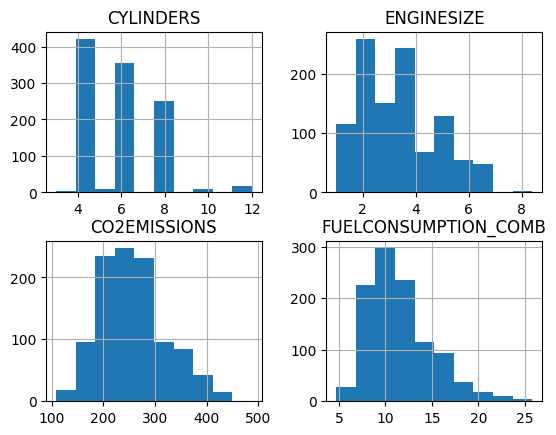

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

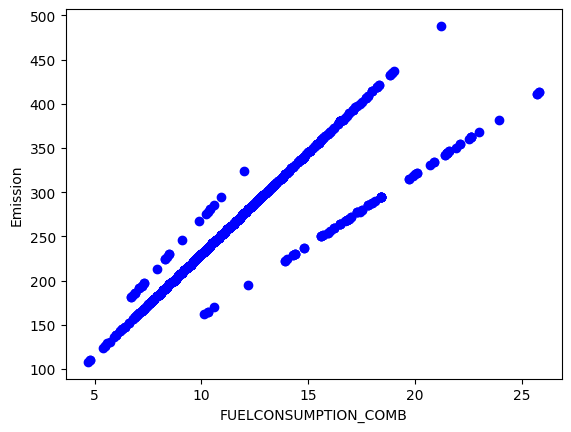

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

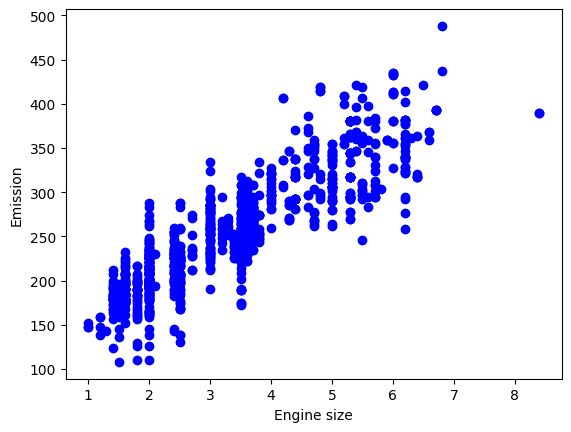

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

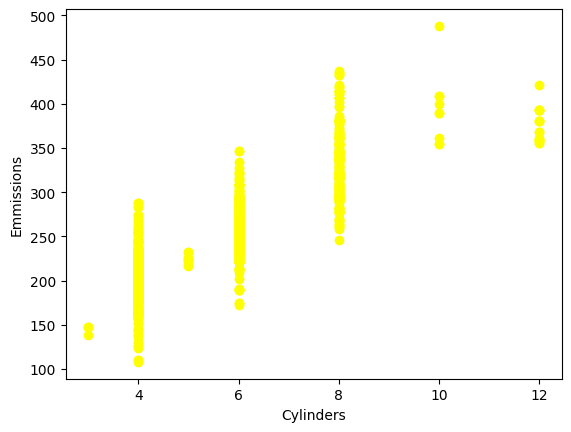

In [10]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='yellow')
plt.xlabel('Cylinders')
plt.ylabel('Emmissions')
plt.show()

In [16]:
#80% train 20% test
msk = np.random.rand(len(df)) < 0.8
msk

array([ True,  True,  True, ...,  True,  True, False], shape=(1067,))

In [19]:
train = cdf[msk]
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
5,3.5,6,10.0,230
...,...,...,...,...
1060,3.0,6,11.5,264
1061,3.2,6,11.2,258
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271


In [20]:
test = cdf[~msk]
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
4,3.5,6,10.6,244
13,5.9,12,15.6,359
19,2.0,4,8.8,202
26,3.0,6,10.9,251
32,3.0,6,8.4,227
...,...,...,...,...
1048,2.0,4,7.1,192
1054,3.6,6,12.2,281
1057,2.5,5,10.1,232
1062,3.0,6,11.8,271


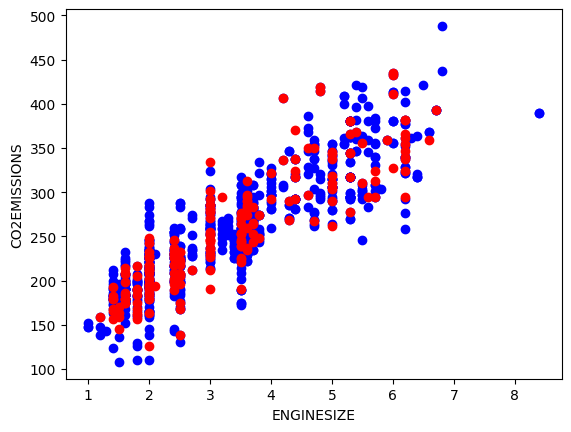

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
ax.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [27]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)

print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[38.67913557]]
Intercept:  [126.77345109]


Text(0, 0.5, 'Emission')

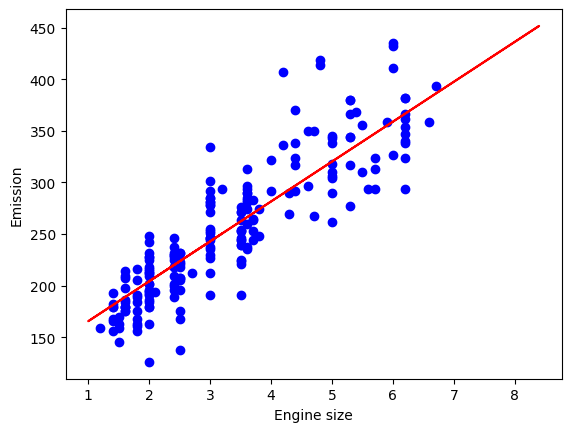

In [31]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")